<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/ImportanceSampling/Ejercicios.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Tema 5 (Parte IV): Muestreo por Importancia

## Ejercicio 1

[1] 2.014271
[1] "0.16:   0.461558173193318/0.1 = 4.61558173193318"
[1] "0.31:   0.428207588741807/0.1 = 4.28207588741807"
[1] "0.42:   0.405292122985094/0.1 = 4.05292122985094"
[1] "0.69:   0.3541101767339/0.1 = 3.541101767339"
[1] "1.8:   0.2032848298703/0.1 = 2.032848298703"
[1] "2.91:   0.116700181950576/0.1 = 1.16700181950576"
[1] "3.21:   0.100444777455116/0.1 = 1.00444777455116"
[1] "4.04:   0.0663277325400609/0.1 = 0.663277325400609"
[1] "8.58:   0.00685246264868247/0.1 = 0.0685246264868247"
[1] "9.67:   0.00397334416248173/0.1 = 0.0397334416248173"


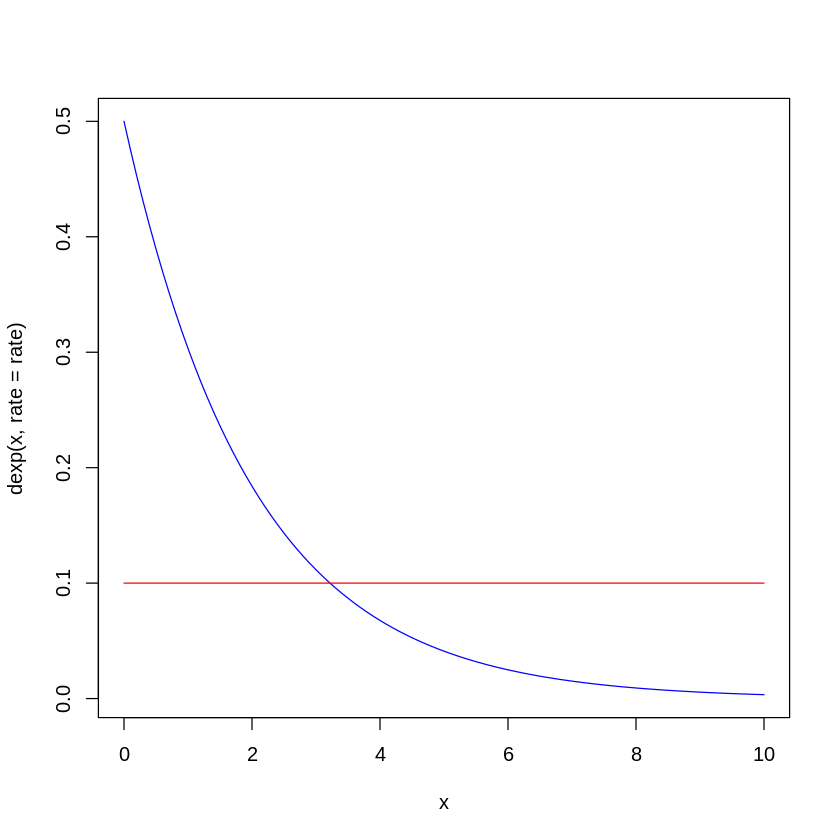

In [ ]:

beta = 2
rate = 1/beta
m = 10

a = 0
b = 10

curve(dexp(x, rate = rate), from=0, to=10, col='blue')
curve(dunif(x, a,b), from=-0, to=10, col='red', add=T)


set.seed(87)
S = round(sort(runif(m,a,b)), 2)

p = dexp(S,rate) # rate * exp(-rate*S)
p_star = dunif(S,a,b) #1/(b-a)

weights = p/p_star

expS =  1/m * sum(weights * S)
print(expS)

for(i in 1:m){
  print(paste0(S[i],":   ",p[i],"/",p_star[i]," = ",weights[i]))
}



## Ejercicio 2

function (n, min = 0, max = 1) 
.Call(C_runif, n, min, max)
<bytecode: 0x5ca618481680>
<environment: namespace:stats>

[1] 0.07203982
[1] "-2.19:   0.0362618689049062/0.2 = 0.181309344524531"
[1] "-1.49:   0.131468429872231/0.2 = 0.657342149361155"
[1] "-1.17:   0.201213542735197/0.2 = 1.00606771367599"
[1] "-0.64:   0.325062264084082/0.2 = 1.62531132042041"
[1] "0.36:   0.373910605373128/0.2 = 1.86955302686564"
[1] "0.65:   0.322972359667914/0.2 = 1.61486179833957"
[1] "0.8:   0.289691552761483/0.2 = 1.44845776380741"
[1] "1.99:   0.0550789023721258/0.2 = 0.275394511860629"
[1] "2.04:   0.0498000877350708/0.2 = 0.249000438675354"
[1] "2.22:   0.0339407631824492/0.2 = 0.169703815912246"


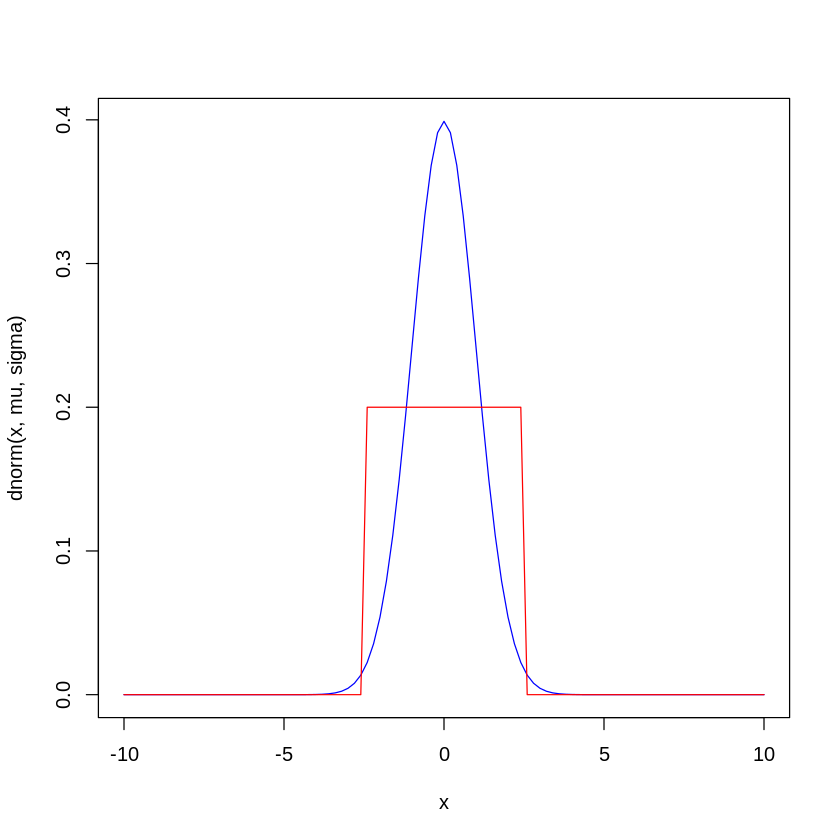

In [ ]:

mu = 0
sigma = 1

a = -2.5
b = 2.5



m = 10


curve(dnorm(x, mu,sigma), from=-10, to=10, col='blue')
curve(dunif(x, a,b), from=-10, to=10, col='red', add=T)

runif

set.seed(1)
S = round(sort(runif(m,a,b)),2)


p = dnorm(S, mu,sigma)
p_star = dunif(S,a,b) #1/(b-a)

weights = p/p_star

expS =  1/m * sum(weights * S)
print(expS)

for(i in 1:m){
  print(paste0(S[i],":   ",p[i],"/",p_star[i]," = ",weights[i]))

}


## Ejercicio 3

[1] "-2.215:   6.68595121616023e-06/0.0343191753400402 = 0.000194816779538398"
[1] "-0.621:   0.00908565878381767/0.328979765481247 = 0.0276176827183482"
[1] "0.39:   0.0633597126672727/0.369727684111432 = 0.171368592047807"
[1] "1.125:   0.0720566930445232/0.211876645775699 = 0.340087944948898"
[1] "1.512:   0.0499470883734014/0.127197976883736 = 0.392672034548591"
[1] "a= 1.10046733311245   b= 0.504494870437282"


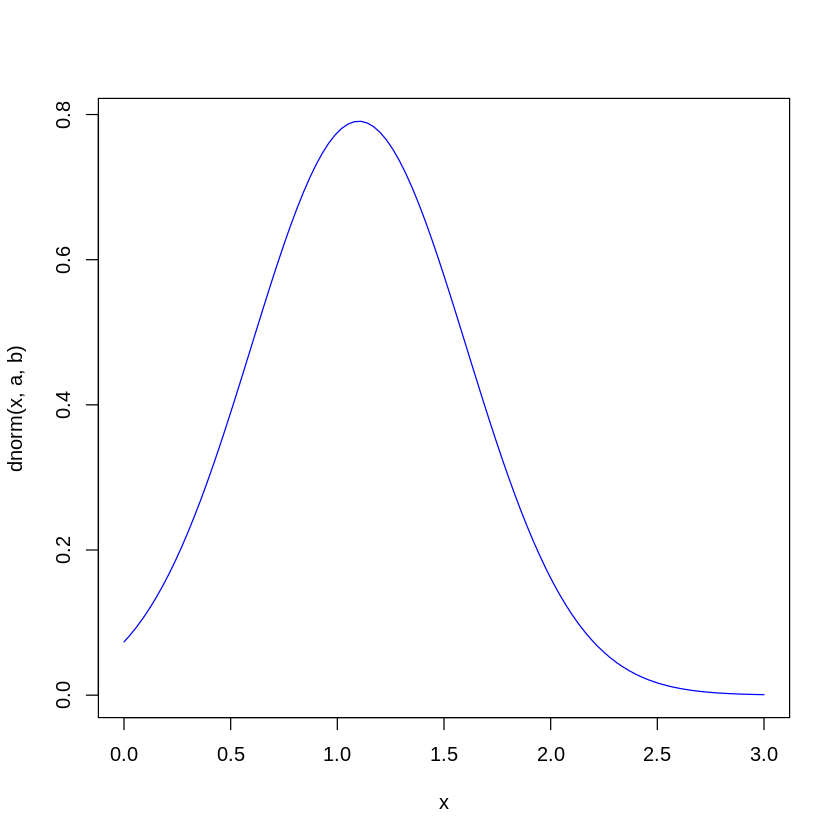

In [ ]:

# X ~ N(mu,1), mu ~ N(a,b)
# prior = N(a=0,b=1)
a=0
b=1

m = 5
datasize = 10

set.seed(1)

x = round(rnorm(datasize,2,1),2)


# for(j in 1:length(x)) {

s_mu = round(sort(rnorm(m,a,b)),3)

p = dnorm(x[j], s_mu, 1) * dnorm(s_mu, a,b)
p_star = dnorm(s_mu, a,b)

weights = p/p_star
sum_weights = sum(weights)

est_mu = 1/sum_weights*sum(weights*s_mu)
est_mu2 = 1/sum_weights*sum(weights*s_mu^2)

a = est_mu
b = sqrt(est_mu2-est_mu^2)

for(i in 1:m){
  print(paste0(s_mu[i],":   ",p[i],"/",p_star[i]," = ",weights[i]))
}

print(paste("a=",a,"  b=",b))

# }

curve(dnorm(x,a,b), from=-0, to=3, col="blue")



# Ejercicio 4




[1] "a= 3.26325382960695   b= 7.71629073213544"


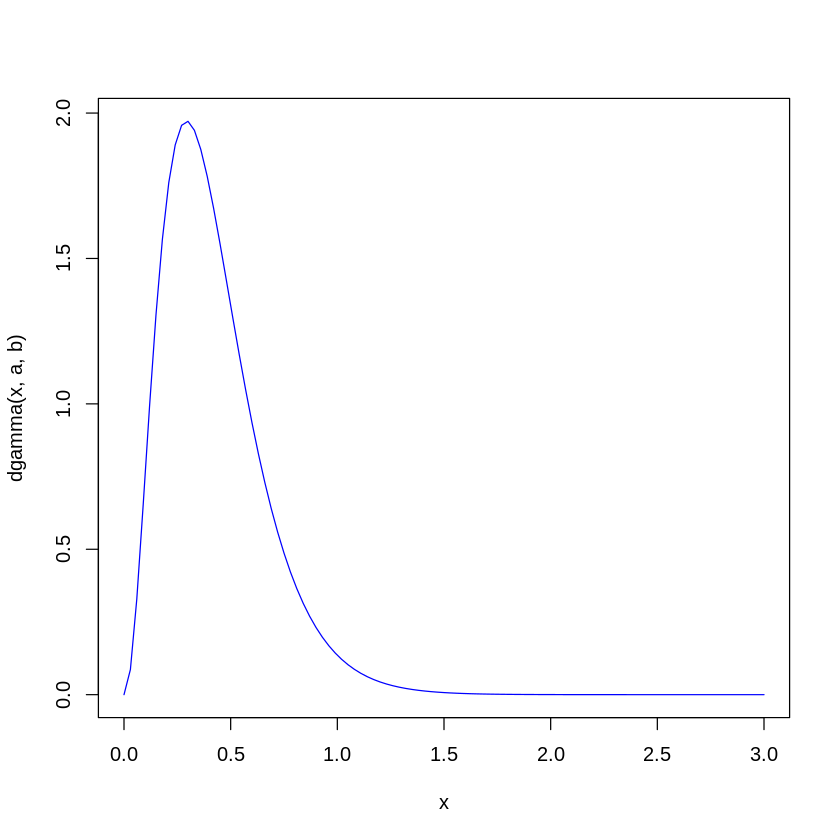

In [ ]:



# X ~ N(2,tau), tau ~ Gamma(a,b)
# prior = Gamma(a=2,b=5)
a=2
b=5

m = 5
datasize = 10

set.seed(1)

x = round(rnorm(datasize,2,1),2)

j=1
# for(j in 1:length(x)) {
s_tau = round(sort(rgamma(m,a,b)),2)

p = dnorm(x[j], 2, sqrt(1/s_tau)) * dgamma(s_tau, a,b)
p_star = dgamma(s_tau, a,b)

weights = p/p_star
sum_weights = sum(weights)


est_tau = 1/sum_weights*sum(weights*s_tau)
est_tau_2 = 1/sum_weights*sum(weights*s_tau^2)
var_tau = est_tau_2 - est_tau^2
a = (est_tau^2)/var_tau
b = est_tau/var_tau

#for(i in 1:m){
#  print(paste0(s_tau[i],":   ",p[i],"/",p_star[i]," = ",weights[i]))
#}

print(paste("a=",a,"  b=",b))
#}

curve(dgamma(x, a,b), from=-0, to=3, col='blue')



## Ejecicio 5

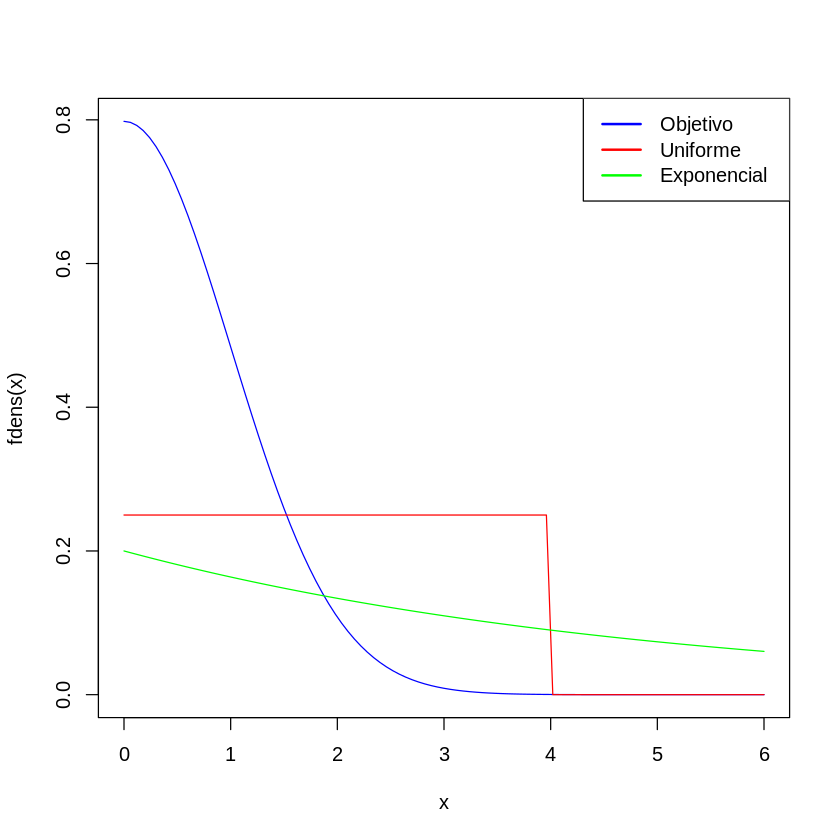

In [3]:

fdens <- function(x) {
  sqrt(2/pi) * exp(-x^2/2)
}

indicator <- function(x,a,b){
  x>=a & x<=b
}


a = 0
b = 4
rate = 0.2
datasize = 1000

curve(fdens(x), from=0, to=6, col='blue')
curve(dunif(x, a,b), from=-0, to=6, col='red', add=T)
curve(dexp(x, rate), from=-0, to=6, col='green', add=T)
legend(x="topright",legend = c("Objetivo", "Uniforme", "Exponencial"), col=c("blue","red","green"), lwd = 2)



In [6]:
# Integrando

integrate(fdens,0,1) # P(X<1) integrando la función


0.6826895 with absolute error < 7.6e-15

In [4]:
### Usando la uniforme ####
set.seed(1)
s_x = runif(datasize,a,b)
p = fdens(s_x)
p_star = dunif(s_x,a,b)
weights = p/p_star
E_x = sum(weights * s_x)/datasize
p_xleq1 = sum(weights * indicator(s_x,0,1))/datasize # P(X<1)
cat("P(X<1) = ", p_xleq1, " (uniforme)\n")

P(X<1) =  0.667798  (uniforme)


In [5]:
#### Usando la exponencial #####
set.seed(1)
s_x = rexp(datasize,rate)
p = fdens(s_x)
p_star = dexp(s_x,rate)
weights = p/p_star
E_x = sum(weights * s_x)/datasize
p_xleq1 = sum(weights * indicator(s_x,0,1))/datasize # P(X<1)
cat("P(X<1) = ", p_xleq1, " (exponencial)\n")



P(X<1) =  0.6067884  (exponencial)


## Ejercicio 6

In [7]:


X =c(0.5, 0.5, 0.5)
la = 1
lb = 1
datasize = 1000



for(i in 1:length(X)) {
  x = X[i]

  s_alpha = rexp(datasize, 0.5)
  s_beta = rexp(datasize, 0.5)

  p = dexp(s_alpha,la) * dexp(s_beta,lb) * dbeta(x, s_alpha, s_beta )
  p_star = dexp(s_alpha,1) * dexp(s_beta,1)

  weights = p/p_star
  sum_weights = sum(weights)

  est_alpha = 1/sum_weights*sum(weights*s_alpha)
  est_beta = 1/sum_weights*sum(weights*s_beta)

  la = 1/est_alpha
  lb = 1/est_beta
  cat("lambda_a = ",la,"lambda_b = ",lb,"\n")
}



lambda_a =  0.4170339 lambda_b =  0.4140378 
lambda_a =  0.1056602 lambda_b =  0.09052826 
lambda_a =  0.1845388 lambda_b =  0.1076255 
